In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('input.csv')
df1

,y-size,y-local
0,4,1.373240
1,4,-4.944870
2,4,-7.841000
3,3,0.978565
4,7,-7.251630
...,...,...
13459,5,-4.636650
13460,5,1.955300
13461,2,7.074700
13462,6,0.127066


In [3]:
df2 = pd.read_csv('labels.csv')
df2

,pt
0,0
1,1
2,1
3,0
4,0
...,...
13459,0
13460,0
13461,0
13462,0


In [4]:
X = df1.values
y = df2.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(13464, 2) (13464, 1)
(10771, 2) (2693, 2) (10771, 1) (2693, 1)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [6]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train.ravel())
y_pred = logistic_model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test,y_pred)*100

In [8]:
accuracy

72.6698848867434

In [9]:
cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy = {:0.3f}'.format(accuracy))

True Positive(TP)  =  1020
False Positive(FP) =  417
True Negative(TN)  =  937
False Negative(FN) =  319
Accuracy = 0.727


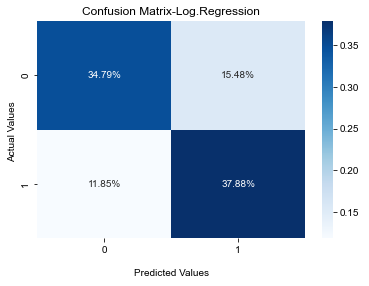

In [10]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%',cmap='Blues')
sns.set(rc={'figure.figsize':(5,5)})

ax.set_title('Confusion Matrix-Log.Regression');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt = ax.get_figure()
plt.savefig('logistic300.png')